In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

In [2]:
crimedata = pd.read_csv("I:/Masters/SPRING 18/SPATIAL AND TEMPORAL/spatial/project/final/datap3_clean.csv")
print(crimedata.shape)
crimedata.head(5)

(1779710, 83)


,Unnamed: 0,ID,Date,Block,IUCR,Description,Location.Description,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Latitude,Longitude,Location,severe,Primary.Type_ARSON,Primary.Type_ASSAULT,Primary.Type_BATTERY,Primary.Type_BURGLARY,Primary.Type_CRIM.SEXUAL.ASSAULT,Primary.Type_CRIMINAL.DAMAGE,Primary.Type_CRIMINAL.TRESPASS,Primary.Type_DECEPTIVE.PRACTICE,Primary.Type_GAMBLING,Primary.Type_HOMICIDE,Primary.Type_INTERFERENCE.WITH.PUBLIC.OFFICER,Primary.Type_INTIMIDATION,Primary.Type_KIDNAPPING,Primary.Type_LIQUOR.LAW.VIOLATION,Primary.Type_MOTOR.VEHICLE.THEFT,Primary.Type_NARCOTICS,Primary.Type_OFFENSE.INVOLVING.CHILDREN,Primary.Type_PROSTITUTION,Primary.Type_PUBLIC.PEACE.VIOLATION,Primary.Type_ROBBERY,Primary.Type_SEX.OFFENSE,Primary.Type_STALKING,Primary.Type_THEFT,Primary.Type_WEAPONS.VIOLATION,District_D1.0,District_D10.0,District_D11.0,District_D12.0,District_D14.0,District_D15.0,District_D16.0,District_D17.0,District_D18.0,District_D19.0,District_D2.0,District_D20.0,District_D22.0,District_D24.0,District_D25.0,District_D3.0,District_D4.0,District_D5.0,District_D6.0,District_D7.0,District_D8.0,District_D9.0,District,Primary.Type,time_24hour,Date_no_time,Timeblock_0,Timeblock_12,Timeblock_15,Timeblock_18,Timeblock_21,Timeblock_3,Timeblock_6,Timeblock_9,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,closest_station
0,1,10000092,03/18/2015 07:44:00 PM,047XX W OHIO ST,041A,AGGRAVATED: HANDGUN,STREET,28,25,04B,1144606,1903566,2015,41.891399,-87.744385,"(41.891398860999999, -87.744384567000012)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D11.0,BATTERY,19:44,20150318,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1.452234
1,2,10000095,03/18/2015 10:45:00 PM,044XX S LAKE PARK AVE,0486,DOMESTIC BATTERY SIMPLE,APARTMENT,4,39,08B,1185075,1875622,2015,41.813861,-87.596643,"(41.813860679999998, -87.596642837000005)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D2.0,BATTERY,22:45,20150318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.933692
2,3,10000096,03/18/2015 10:30:00 PM,051XX S MICHIGAN AVE,0460,SIMPLE,APARTMENT,3,40,08B,1178033,1870804,2015,41.800802,-87.622619,"(41.800802415, -87.622619342999997)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D2.0,BATTERY,22:30,20150318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.414610
3,4,10000097,03/18/2015 09:00:00 PM,047XX W ADAMS ST,031A,ARMED: HANDGUN,SIDEWALK,28,25,03,1144920,1898709,2015,41.878065,-87.743354,"(41.878064760999997, -87.743354012999987)",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,D11.0,ROBBERY,21:00,20150318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.284859
4,5,10000098,03/18/2015 10:00:00 PM,049XX S DREXEL BLVD,0460,SIMPLE,APARTMENT,4,39,08B,1183018,1872537,2015,41.805443,-87.604284,"(41.805443345, -87.604283976000005)",1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,D2.0,BATTERY,22:00,20150318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.375457


### Plotting crime rates
#### Here, we will plot the occurence rates of the following:

1. Crime Type
2. Scene of Crime
3. Time of Crime
4. Day of Crime
5. Month of Crime
5. Average Temperature of Crime

In [3]:
# Occurrence rates of the various types of crime
crimetypegb=crimedata.groupby(["Primary.Type"])["Primary.Type"].count()/len(crimedata)*100
crimetypegb.sort_values(ascending=False, inplace=True)
print(crimetypegb)


Primary.Type
THEFT                               23.469554
BATTERY                             19.667024
CRIMINAL DAMAGE                     11.690837
NARCOTICS                            9.795304
ASSAULT                              6.753572
BURGLARY                             6.564496
MOTOR VEHICLE THEFT                  4.995533
DECEPTIVE PRACTICE                   4.662838
ROBBERY                              4.350147
CRIMINAL TRESPASS                    2.309871
WEAPONS VIOLATION                    1.391575
PUBLIC PEACE VIOLATION               0.917172
OFFENSE INVOLVING CHILDREN           0.809177
PROSTITUTION                         0.567845
CRIM SEXUAL ASSAULT                  0.485191
INTERFERENCE WITH PUBLIC OFFICER     0.440802
SEX OFFENSE                          0.335111
GAMBLING                             0.169747
ARSON                                0.164746
HOMICIDE                             0.144630
LIQUOR LAW VIOLATION                 0.124121
KIDNAPPING           

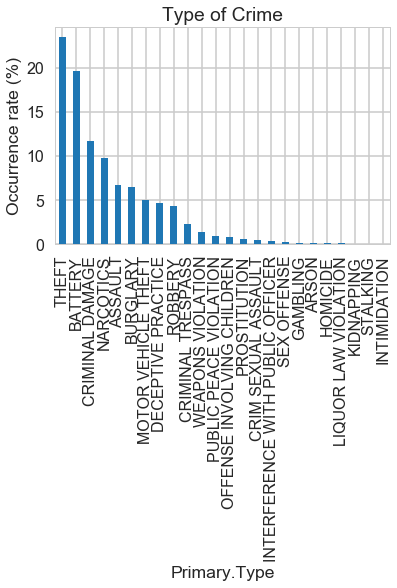

In [4]:
crimetypegb.plot(kind='bar',title="Type of Crime")
plt.ylabel('Occurrence rate (%)')

In [5]:
locationgb=crimedata.groupby(['Location.Description'])["Location.Description"].count()/len(crimedata)*100
locationgb.sort_values(ascending=False, inplace=True)
print(locationgb)

Location.Description
STREET                            25.349973
RESIDENCE                         15.873766
APARTMENT                         13.384877
SIDEWALK                          12.169230
OTHER                              3.925021
PARKING LOT/GARAGE(NON.RESID.)     3.316889
ALLEY                              2.433936
RESIDENTIAL YARD (FRONT/BACK)      2.351619
SMALL RETAIL STORE                 2.234690
RESIDENCE-GARAGE                   2.073877
RESTAURANT                         2.037242
RESIDENCE PORCH/HALLWAY            1.967736
SCHOOL, PUBLIC, BUILDING           1.967287
VEHICLE NON-COMMERCIAL             1.864573
DEPARTMENT STORE                   1.631951
GROCERY FOOD STORE                 1.267791
GAS STATION                        1.227728
PARK PROPERTY                      0.934984
BAR OR TAVERN                      0.766586
CTA TRAIN                          0.580544
CTA PLATFORM                       0.564586
COMMERCIAL / BUSINESS OFFICE       0.560316
CONVENIENCE

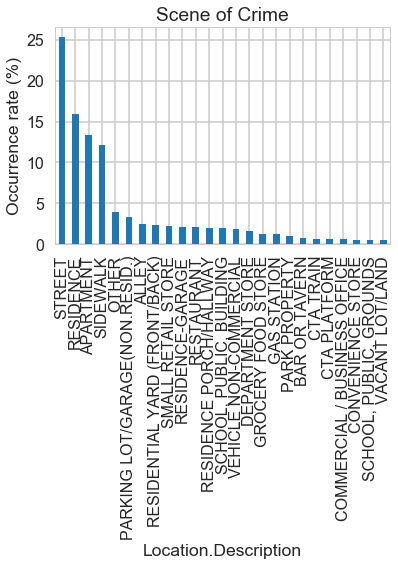

In [6]:
locationgb.plot(kind='bar',title="Scene of Crime")
plt.ylabel('Occurrence rate (%)')

In [7]:
from datetime import datetime
format = '%m/%d/%Y %I:%M:%S %p'
crimedata["time_hour"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%H"))
crimedata["month"]=crimedata.Date.apply(lambda row: datetime.strptime(row, format).strftime("%m"))

In [8]:
timegb=crimedata.groupby(['time_hour'])["time_hour"].count()/len(crimedata)*100
print(timegb)


time_hour
00    4.949739
01    3.140736
02    2.691955
03    2.210135
04    1.657068
05    1.410342
06    1.641391
07    2.342236
08    3.405105
09    4.374701
10    4.244399
11    4.497250
12    5.637941
13    4.715263
14    5.026156
15    5.423355
16    5.155671
17    5.174158
18    5.668339
19    5.859269
20    5.647999
21    5.369414
22    5.376101
23    4.381276
Name: time_hour, dtype: float64


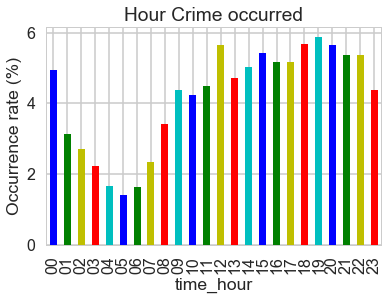

In [9]:
timegb.plot(kind='bar',title="Hour Crime occurred",color='bgyrc')
plt.ylabel('Occurrence rate (%)')

In [10]:
weekday=crimedata[["Weekday_Monday","Weekday_Tuesday","Weekday_Wednesday","Weekday_Thursday","Weekday_Friday","Weekday_Saturday","Weekday_Sunday"]].sum()/len(crimedata)*100
print(weekday)

Weekday_Monday       14.053188
Weekday_Tuesday      14.035208
Weekday_Wednesday    14.164218
Weekday_Thursday     14.069258
Weekday_Friday       14.991206
Weekday_Saturday     14.638509
Weekday_Sunday       14.048412
dtype: float64


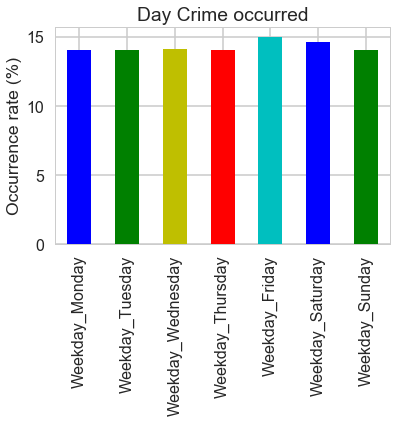

In [11]:
weekday.plot(kind='bar',title="Day Crime occurred",color='bgyrc')
plt.ylabel('Occurrence rate (%)')

In [12]:
month_group=crimedata.groupby(['month'])['month'].count()/len(crimedata)*100
print(month_group)

month
01    7.754915
02    6.675076
03    8.100028
04    8.129583
05    8.958932
06    9.108787
07    9.473454
08    9.299155
09    8.611122
10    8.544370
11    7.777728
12    7.566851
Name: month, dtype: float64


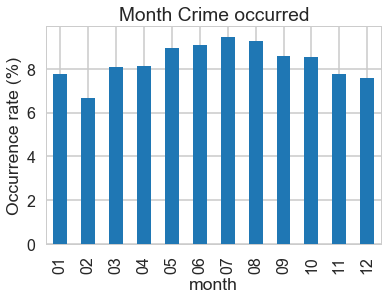

In [13]:
month_group.plot(kind='bar',title="Month Crime occurred")
plt.ylabel('Occurrence rate (%)')

### Now we focus on only the 4 major types of crimes

In [14]:
def topfour(row):
    keep = ["THEFT", "BATTERY", "NARCOTICS", "CRIMINAL DAMAGE"]
    if row not in keep:
        return "OTHERS"
    else:
        return row

In [15]:
crimedata["New_Type"] = crimedata["Primary.Type"].apply(topfour)

In [16]:
# Here we write a function to take in a column name, title, and return a plot that displays the percentage, per column
# with the normalized types of crimes for each feature in the selected column
def plotsplit(cnam, title):
    datasplit = crimedata.groupby([cnam, "New_Type"])[cnam].count().unstack()
    # Convert everything to percentage for normalization, so we can compare!
    datasplit= datasplit.apply(lambda c: c / c.sum() * 100, axis=1)
    # Reorder columns
    datasplit = datasplit[['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']]
    datasplit.plot(kind = "bar", stacked = True, title = title)
    plt.ylabel('Fraction of Crime Type (%)')
    # Anchoring legend from http://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
    plt.ylim([0,120])

In [22]:
import matplotlib.pyplot as pltd

pltd.rcParams["figure.figsize"] = (12,9)

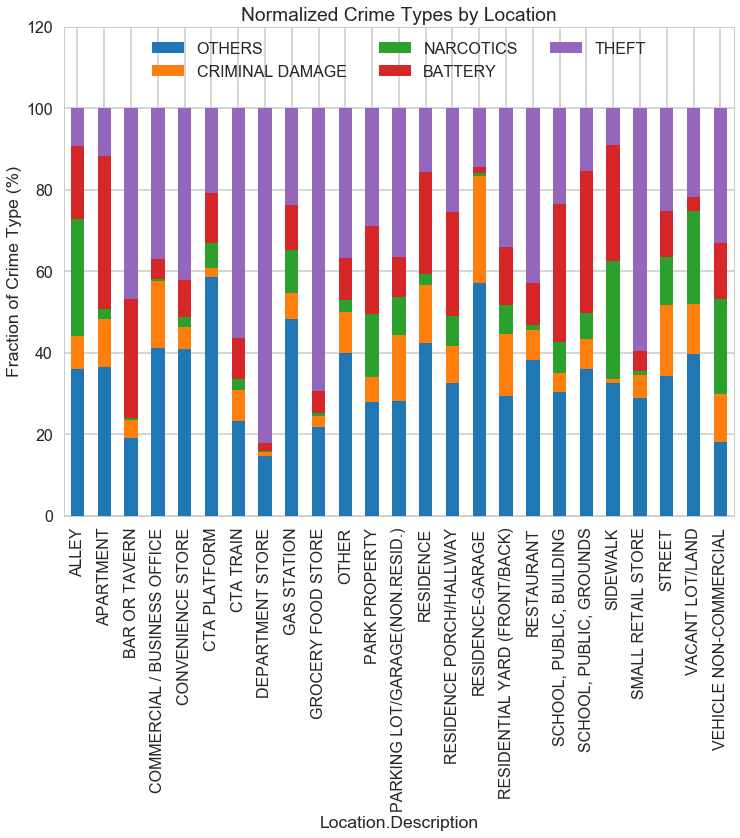

In [23]:

plotsplit("Location.Description", "Normalized Crime Types by Location")

#### Crime type per hour of day

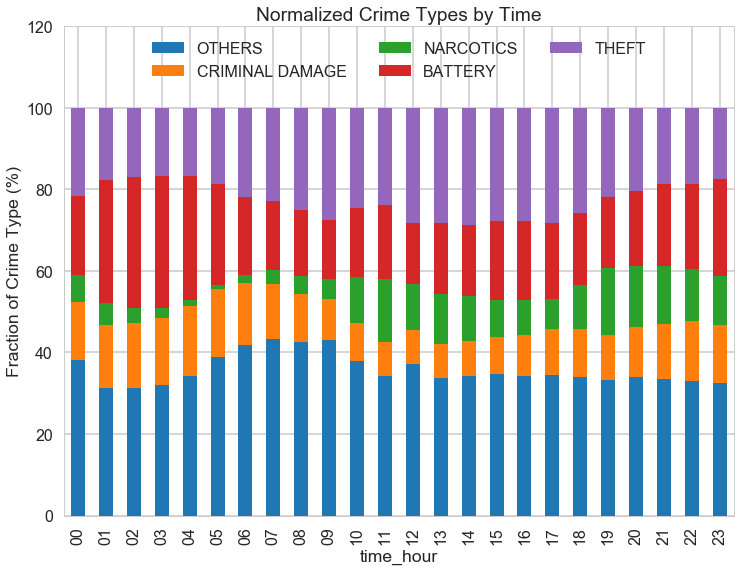

In [24]:

plotsplit("time_hour", "Normalized Crime Types by Time")

#### Crimes by day: First we need to un-get_dummies the data

In [25]:
# Writing a function to turn Mon, Tue, Wed, Thur, Fri, Sat, Sun into 1 - 7
crimedata["Weekday_Tuesday"] = (crimedata["Weekday_Tuesday"].apply(lambda x: x+1 if x > 0 else 0))
crimedata["Weekday_Wednesday"] = (crimedata["Weekday_Wednesday"].apply(lambda x: x+2 if x > 0 else 0))
crimedata["Weekday_Thursday"] = (crimedata["Weekday_Thursday"].apply(lambda x: x+3 if x > 0 else 0))
crimedata["Weekday_Friday"] = (crimedata["Weekday_Friday"].apply(lambda x: x+4 if x > 0 else 0))
crimedata["Weekday_Saturday"] = (crimedata["Weekday_Saturday"].apply(lambda x: x+5 if x > 0 else 0))
crimedata["Weekday_Sunday"] = (crimedata["Weekday_Sunday"].apply(lambda x: x+6 if x > 0 else 0))

In [26]:
crimedata["Num_Day"] = crimedata["Weekday_Monday"] + crimedata["Weekday_Tuesday"] + crimedata["Weekday_Wednesday"] + crimedata["Weekday_Thursday"] + crimedata["Weekday_Friday"] + crimedata["Weekday_Saturday"] + crimedata["Weekday_Sunday"]
crimedata["Num_Day"] = crimedata["Num_Day"].astype(int)

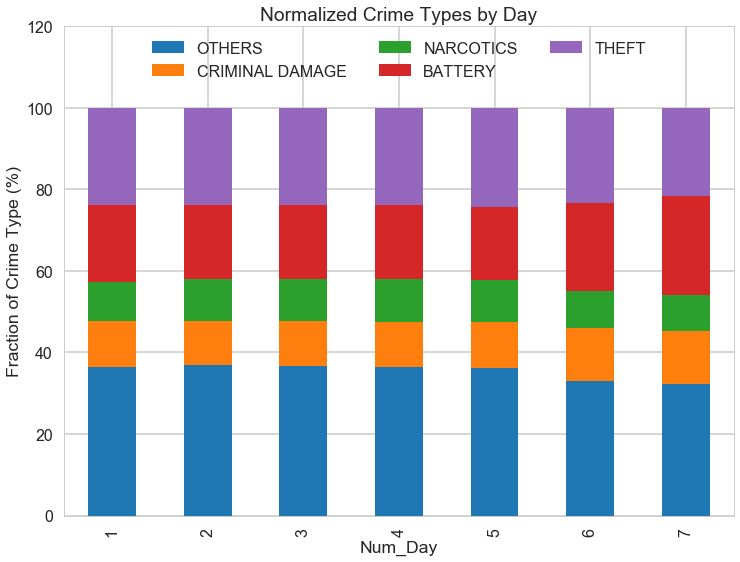

In [27]:

plotsplit("Num_Day", "Normalized Crime Types by Day")

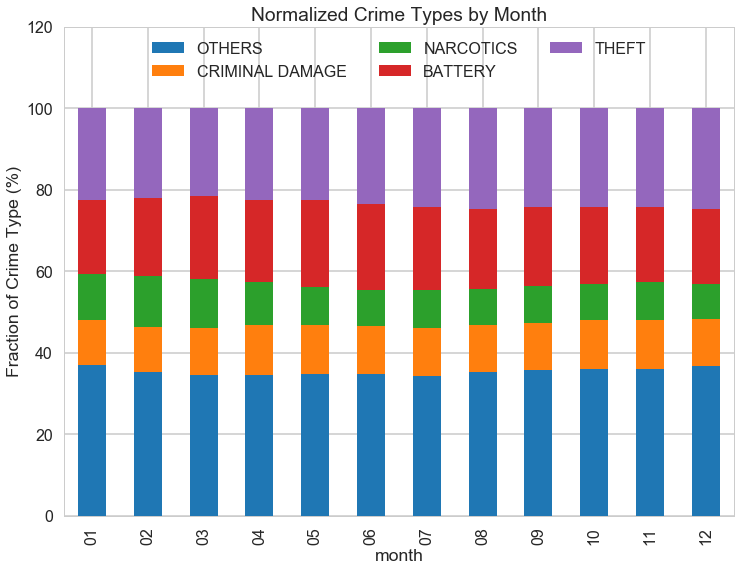

In [28]:
plotsplit("month", "Normalized Crime Types by Month")

#### Now lets make a map to visualize the crime locations and type

In [29]:
import folium
from IPython.display import HTML

In [30]:
def display(m, height=300):
    """Takes a folium instance and embed HTML."""
    m._build_map()
    srcdoc = m.HTML.replace('"', '&quot;')
    embed = HTML('<iframe srcdoc="{0}" '
                 'style="width: 100%; height: {1}px; '
                 'border: none"></iframe>'.format(srcdoc, height))
    return embed

#### We can start an instance of the Chicago map like this: 

In [36]:
map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
folium.Marker([41.8369, -87.6847]).add_to(map) 
#display(map)

In [ ]:
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(map)
##mapping the main crime types to the map 
types = ['OTHERS', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BATTERY', 'THEFT']
for i in types:
    typedata=crimedata[crimedata["New_Type"]==i]
    map = folium.Map(location=[41.8369, -87.6847], zoom_start=10)
    #add a marker for every record in the filtered data, use a clustered view
    for each in typedata[0:len(typedata)].iterrows():
        folium.Marker(
            location = [each[1]['Latitude'],each[1]['Longitude']]).add_to(marker_cluster)
    #display(map)
    map.create_map(path=i + 'map.html')